# Analysis of Restaurant Data
## Goals
- To identify the top 50 restraunts within this dataset
- To see which locations/countries have the best rated restaurants
- To see what are the most common cuisines offered
- To see what are the most common payment methods
- Reviewer demographic breakdown & preference analysis
    - What kind of restaurants do the different drinking types go to?
    - Do reviewers of certain age ranges have a tendency to rate a restaurant differently?
    - Does a reviewer's budget level influence the ratings of restraunts? 
    - How much influence does a reviewer's interest have on their choice of restraunt?
    - To what extend does a reviewer's marital status affect which restraunts they go to?

## List of CSVs
### Restaurants
1. chefmozaccepts.csv
2. chefmozcuisine.csv
3. chefmozhours4.csv
4. chefmozparking.csv
5. geoplaces2.csv

### Consumers
6. usercuisine.csv
7. userpayment.csv
8. userprofile.csv

### User-Item-Rating
9. rating_final.csv

# Find the Top 50 Restaurants
We'll use the `rating_final.csv` for user ratings, and the `geoplaces2.csv` for restaurant information. 

In [1]:
import pandas as pd
import numpy as np
import pprint
import seaborn as sns

In [2]:

rating_final_df = pd.read_csv('./data/rating_final.csv')
print(rating_final_df.dtypes)

userID            object
placeID            int64
rating             int64
food_rating        int64
service_rating     int64
dtype: object


In [3]:
geoplaces2_df = pd.read_csv('./data/geoplaces2.csv')
print(geoplaces2_df.dtypes)

placeID             int64
latitude          float64
longitude         float64
the_geom_meter     object
name               object
address            object
city               object
state              object
country            object
fax                object
zip                object
alcohol            object
smoking_area       object
dress_code         object
accessibility      object
price              object
url                object
Rambience          object
franchise          object
area               object
other_services     object
dtype: object


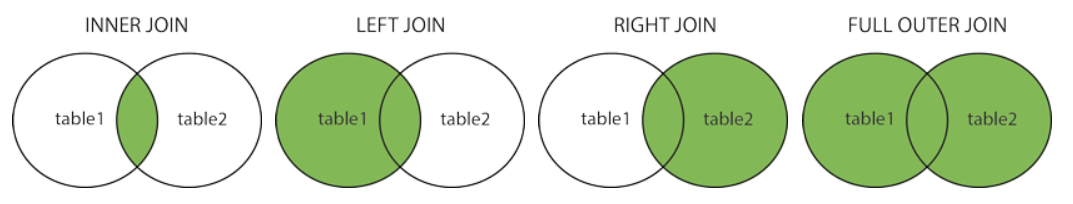

In [4]:
df = rating_final_df.merge(
    geoplaces2_df, 
    on=('placeID'), 
    how='inner', 
    suffixes=('_rating', '_geo' ))
df.head()

,userID,placeID,rating,food_rating,service_rating,latitude,longitude,the_geom_meter,name,address,...,alcohol,smoking_area,dress_code,accessibility,price,url,Rambience,franchise,area,other_services
0,U1077,135085,2,2,2,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
1,U1108,135085,1,2,1,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
2,U1081,135085,1,2,1,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
3,U1056,135085,2,2,2,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none
4,U1134,135085,2,1,2,22.150802,-100.98268,0101000020957F00009F823DA6094858C18A2D4D37F9A4...,Tortas Locas Hipocampo,Venustiano Carranza 719 Centro,...,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,?,familiar,f,closed,none


In [5]:
df.shape #prints the shape of the dataframe

(1161, 25)

In [6]:
df.drop(['the_geom_meter', 'url', 'address', 'zip', 'fax'], axis = 1, inplace = True)

In [7]:
df.head()

,userID,placeID,rating,food_rating,service_rating,latitude,longitude,name,city,state,country,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services
0,U1077,135085,2,2,2,22.150802,-100.98268,Tortas Locas Hipocampo,San Luis Potosi,SLP,Mexico,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,familiar,f,closed,none
1,U1108,135085,1,2,1,22.150802,-100.98268,Tortas Locas Hipocampo,San Luis Potosi,SLP,Mexico,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,familiar,f,closed,none
2,U1081,135085,1,2,1,22.150802,-100.98268,Tortas Locas Hipocampo,San Luis Potosi,SLP,Mexico,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,familiar,f,closed,none
3,U1056,135085,2,2,2,22.150802,-100.98268,Tortas Locas Hipocampo,San Luis Potosi,SLP,Mexico,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,familiar,f,closed,none
4,U1134,135085,2,1,2,22.150802,-100.98268,Tortas Locas Hipocampo,San Luis Potosi,SLP,Mexico,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,familiar,f,closed,none


Since `rating`, `food_rating` and `service_rating` are based on a 2 point scale, we'll re-scale it to 5 so that the aggregated ratings will be out of 5.00 and make it easier for users of the visualization.

In [8]:
df['rating'] = df['rating'] * (5/2)
df['food_rating'] = df['food_rating'] * (5/2)
df['service_rating'] = df['service_rating'] * (5/2)
df.head()

,userID,placeID,rating,food_rating,service_rating,latitude,longitude,name,city,state,country,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services
0,U1077,135085,5.0,5.0,5.0,22.150802,-100.98268,Tortas Locas Hipocampo,San Luis Potosi,SLP,Mexico,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,familiar,f,closed,none
1,U1108,135085,2.5,5.0,2.5,22.150802,-100.98268,Tortas Locas Hipocampo,San Luis Potosi,SLP,Mexico,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,familiar,f,closed,none
2,U1081,135085,2.5,5.0,2.5,22.150802,-100.98268,Tortas Locas Hipocampo,San Luis Potosi,SLP,Mexico,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,familiar,f,closed,none
3,U1056,135085,5.0,5.0,5.0,22.150802,-100.98268,Tortas Locas Hipocampo,San Luis Potosi,SLP,Mexico,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,familiar,f,closed,none
4,U1134,135085,5.0,2.5,5.0,22.150802,-100.98268,Tortas Locas Hipocampo,San Luis Potosi,SLP,Mexico,No_Alcohol_Served,not permitted,informal,no_accessibility,medium,familiar,f,closed,none


## Sorting by the different ratings
In order to figure out which is the most favourite by users, we have to sort the restraunts by the means of `rating`, `food_rating`, and `service_rating` columns.

First, we prepare dataframe to show ratings.
We re-order the column names, removing those that will be aggregated, and then use this list of columns as a basis to group our dataframe

In [9]:
columns = list(df)
columns = [i for i in columns if i not in (
    'placeID',
    'userID',
    'food_rating',
    'service_rating',
    'rating')]
columns.insert(0, 'placeID')

In [10]:
agg_groupby = df.groupby(columns, as_index=False).agg({
    'userID': 'count',
    'rating': 'mean',
    'food_rating': 'mean',
    'service_rating': 'mean',
}).rename(index=str, columns={
    'userID': 'userID_count',
    'rating': 'rating_mean',
    'food_rating': 'food_rating_mean',
    'service_rating': 'service_rating_mean'})
agg_groupby

,placeID,latitude,longitude,name,city,state,country,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services,userID_count,rating_mean,food_rating_mean,service_rating_mean
0,132560,23.752304,-99.166913,puesto de gorditas,victoria,tamaulipas,mexico,No_Alcohol_Served,permitted,informal,no_accessibility,low,familiar,f,open,none,4,1.250000,2.500000,0.625000
1,132561,23.726819,-99.126506,cafe ambar,?,?,?,No_Alcohol_Served,none,informal,completely,low,familiar,f,closed,none,4,1.875000,2.500000,2.500000
2,132564,23.730925,-99.145185,churchs,?,?,?,No_Alcohol_Served,none,informal,completely,low,familiar,f,closed,none,4,3.125000,3.125000,3.750000
3,132572,22.141647,-100.992712,Cafe Chaires,San Luis Potosi,San Luis Potosi,Mexico,No_Alcohol_Served,not permitted,informal,completely,low,familiar,f,closed,none,15,2.500000,2.500000,2.333333
4,132583,18.922290,-99.234332,McDonalds Centro,Cuernavaca,Morelos,Mexico,No_Alcohol_Served,not permitted,informal,partially,low,familiar,t,closed,none,4,2.500000,2.500000,3.125000
5,132584,23.752365,-99.165288,Gorditas Dona Tota,?,?,?,No_Alcohol_Served,not permitted,informal,completely,medium,familiar,t,closed,none,6,3.333333,3.750000,2.500000
6,132594,23.752168,-99.165709,tacos de barbacoa enfrente del Tec,?,?,?,No_Alcohol_Served,not permitted,informal,completely,low,familiar,f,open,none,5,1.500000,3.000000,1.500000
7,132608,23.758805,-99.165130,Hamburguesas La perica,victoria,Tamaulipas,Mexico,No_Alcohol_Served,permitted,informal,completely,low,quiet,t,open,none,6,2.500000,2.916667,2.083333
8,132609,23.760268,-99.165865,Pollo_Frito_Buenos_Aires,victoria,Tamaulipas,Mexico,No_Alcohol_Served,not permitted,informal,completely,low,quiet,t,closed,none,5,1.500000,1.500000,1.500000
9,132613,23.752903,-99.165076,carnitas_mata,victoria,Tamaulipas,Mexico,No_Alcohol_Served,permitted,informal,completely,medium,familiar,t,closed,none,6,2.916667,3.333333,2.500000


## Visualizing the Top 20 Restaurants by Overall Ratings
We prepare a map to visualize where exactly our top 20 restaurants are located.

For this, we will be using the folium python package.

In [11]:
import folium

In [12]:
# We first define the folium map
overall_ratings_map = folium.Map(
    location=[22.1449787,-101.0056829]
)

# We define a function to add our marker to the map
def add_marker(lat,long,map, label=None):
    """Adds a marker to the specified map"""
    folium.Marker([lat,long],
                 popup=label).add_to(map)

# Let's see what this map looks like so far
overall_ratings_map

Ok it doesn't really look like much, but we're going to add the markers to it now!

In [13]:
# We create the dataframe with the overall ratings, with the rating_mean descending
by_overall = agg_groupby.sort_values(['rating_mean'], ascending=False)
by_overall.head(n=5)

,placeID,latitude,longitude,name,city,state,country,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services,userID_count,rating_mean,food_rating_mean,service_rating_mean
57,132955,22.147622,-101.010275,emilianos,san luis potos,mexico,?,Wine-Beer,none,informal,completely,low,familiar,t,closed,variety,5,5.000000,4.50,4.500000
82,135034,22.140517,-101.021422,Michiko Restaurant Japones,San Luis Potosi,SLP,Mexico,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,f,closed,none,5,5.000000,5.00,4.000000
62,134986,18.928798,-99.239513,Restaurant Las Mananitas,Cuernavaca,Morelos,Mexico,Wine-Beer,none,formal,no_accessibility,high,familiar,f,closed,none,8,5.000000,5.00,5.000000
52,132922,22.151135,-100.982311,cafe punta del cielo,?,?,?,No_Alcohol_Served,permitted,formal,completely,medium,familiar,f,closed,none,6,4.583333,3.75,4.583333
26,132755,22.153324,-101.019546,La Estrella de Dimas,San Luis Potosi,S.L.P.,Mexico,No_Alcohol_Served,none,informal,partially,medium,familiar,f,closed,variety,5,4.500000,5.00,4.000000


Let's loop over the 20 restaurants ranked by overall rating to visualize their locations!
We add a marker to the map for each restaurant.
We also add a clickable label for each marker, and add an appropriate description to each.

In [14]:
for index, row in by_overall.head(n=20).iterrows():
    rating = '%.2f' % row['rating_mean']
    add_marker(row['latitude'], row['longitude'],overall_ratings_map, 
               label='<b>{}</b><br>rating: {}'.format(row['name'], rating))
overall_ratings_map

# Visualizing the Top 20 Restaurants by Food Rating
We sort the restraunts now by `food_rating_mean`, but we also use `rating_mean` as a secondary sort key to ensure that restaurants with the same `food_rating_mean` will be appropriately ranked.

In [15]:
by_food = agg_groupby.sort_values(['food_rating_mean', 'rating_mean'], ascending=False)
by_food.head(n=5)

,placeID,latitude,longitude,name,city,state,country,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services,userID_count,rating_mean,food_rating_mean,service_rating_mean
62,134986,18.928798,-99.239513,Restaurant Las Mananitas,Cuernavaca,Morelos,Mexico,Wine-Beer,none,formal,no_accessibility,high,familiar,f,closed,none,8,5.000,5.0,5.000
82,135034,22.140517,-101.021422,Michiko Restaurant Japones,San Luis Potosi,SLP,Mexico,No_Alcohol_Served,none,informal,no_accessibility,medium,familiar,f,closed,none,5,5.000,5.0,4.000
26,132755,22.153324,-101.019546,La Estrella de Dimas,San Luis Potosi,S.L.P.,Mexico,No_Alcohol_Served,none,informal,partially,medium,familiar,f,closed,variety,5,4.500,5.0,4.000
70,135013,18.917441,-99.165945,Giovannis,Jiutepec,Morelos,Mexico,No_Alcohol_Served,none,informal,no_accessibility,low,familiar,f,closed,none,4,4.375,5.0,4.375
16,132667,23.752697,-99.163359,little pizza Emilio Portes Gil,victoria,tamaulipas,?,No_Alcohol_Served,none,informal,completely,low,familiar,t,closed,none,4,3.125,5.0,3.125


In [16]:
sns.set()


In [17]:
by_service = agg_groupby.sort_values(['service_rating_mean', 'rating_mean'], ascending=False)
by_service.head(n=5)



,placeID,latitude,longitude,name,city,state,country,alcohol,smoking_area,dress_code,accessibility,price,Rambience,franchise,area,other_services,userID_count,rating_mean,food_rating_mean,service_rating_mean
62,134986,18.928798,-99.239513,Restaurant Las Mananitas,Cuernavaca,Morelos,Mexico,Wine-Beer,none,formal,no_accessibility,high,familiar,f,closed,none,8,5.000000,5.000,5.000000
52,132922,22.151135,-100.982311,cafe punta del cielo,?,?,?,No_Alcohol_Served,permitted,formal,completely,medium,familiar,f,closed,none,6,4.583333,3.750,4.583333
57,132955,22.147622,-101.010275,emilianos,san luis potos,mexico,?,Wine-Beer,none,informal,completely,low,familiar,t,closed,variety,5,5.000000,4.500,4.500000
70,135013,18.917441,-99.165945,Giovannis,Jiutepec,Morelos,Mexico,No_Alcohol_Served,none,informal,no_accessibility,low,familiar,f,closed,none,4,4.375000,5.000,4.375000
116,135074,22.149689,-100.999525,Restaurante la Parroquia Potosina,San Luis Potosi,SLP,Mexico,Wine-Beer,section,informal,no_accessibility,high,familiar,f,closed,none,4,4.375000,4.375,4.375000
